In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

In [24]:
preprocessed_dataset = pd.read_csv("preprocessed_dataset.csv")

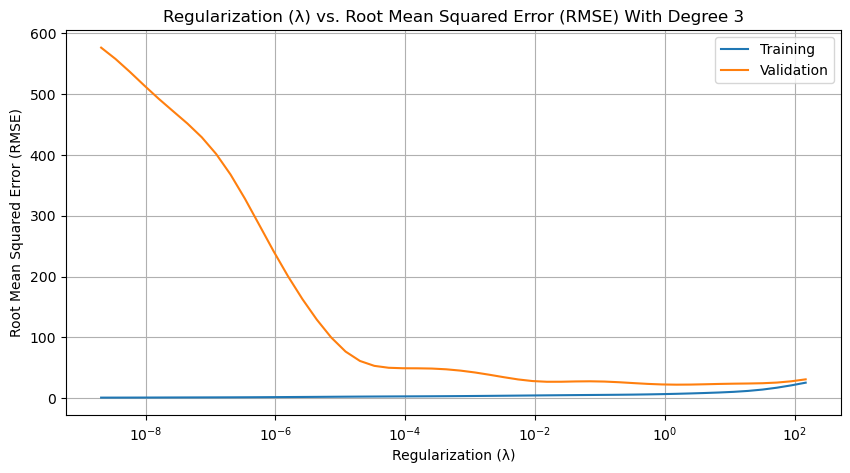

Degree: 3
Best regularization (λ): 1.5040527007501308
Testing RMSE: 29.64227008108572


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=7.08501e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anac

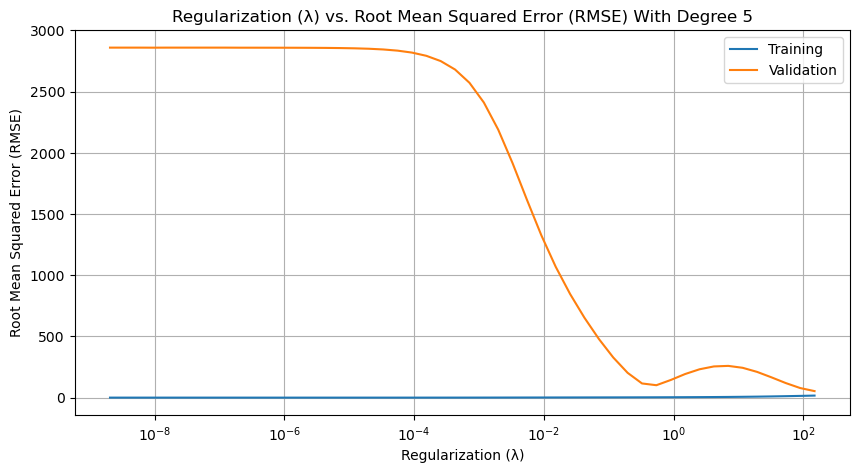

Degree: 5
Best regularization (λ): 148.4131591025766
Testing RMSE: 110.33513083760937


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.59796e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anac

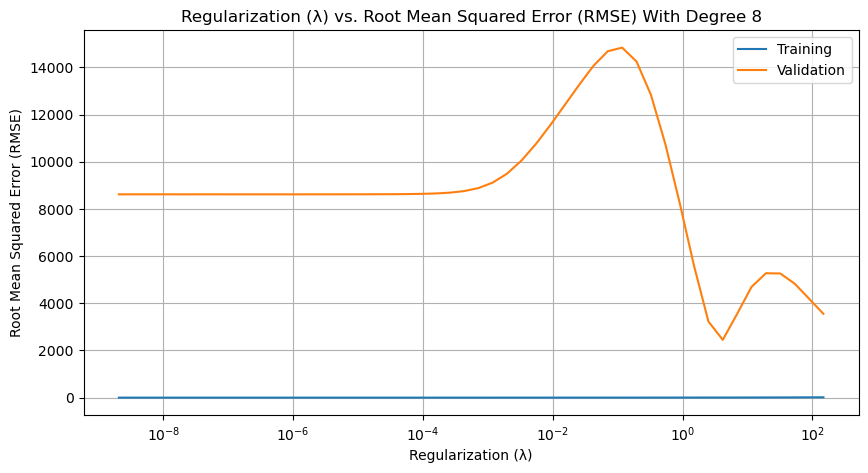

Degree: 8
Best regularization (λ): 4.172733883598105
Testing RMSE: 13331833.58774542


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/lin

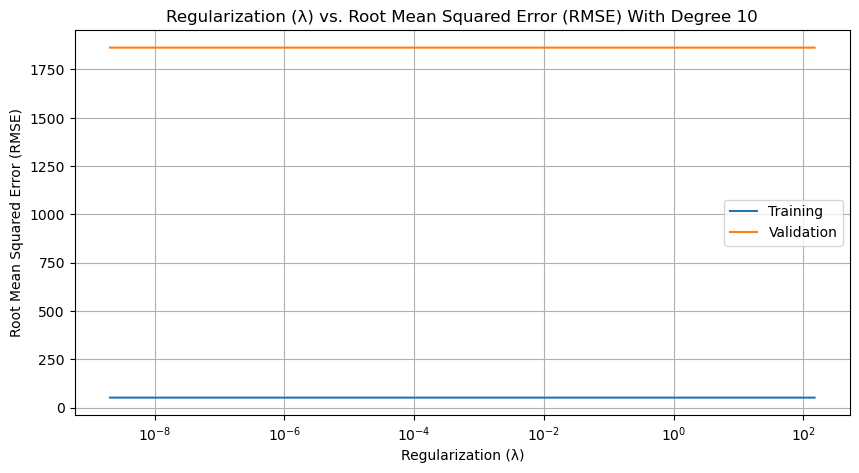

Degree: 10
Best regularization (λ): 148.4131591025766
Testing RMSE: 285.82222559490265


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/lin

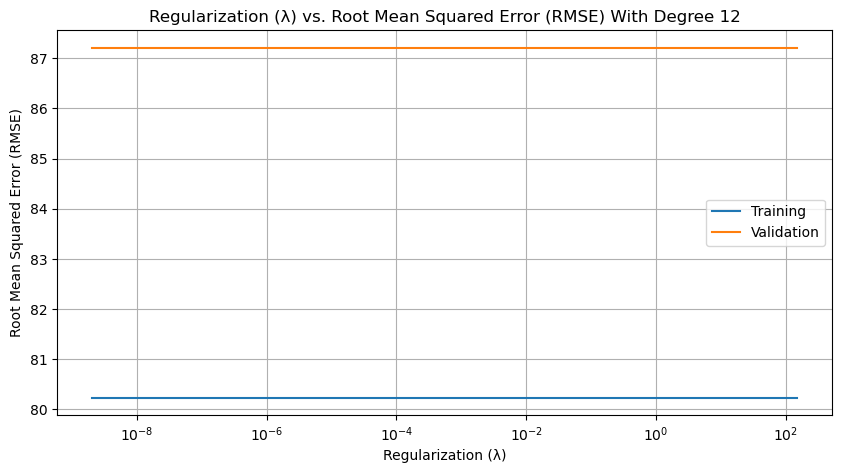

Degree: 12
Best regularization (λ): 2.061153622438558e-09
Testing RMSE: 295.4493781300843


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [25]:
# Perform Regression with a variety of degrees and regularization to get the best combination
X = preprocessed_dataset.drop(columns=["calories"])
Y = preprocessed_dataset["calories"]

degrees = [3, 5, 8, 10, 12]

for deg in degrees:

    F = PolynomialFeatures(degree=deg).fit_transform(X)
    X_test, X_train, Y_test, Y_train = train_test_split(
        F, Y, test_size=2/3, shuffle=True,
    )

    X_validation, X_train, Y_validation, Y_train = train_test_split(
        X_train, Y_train, test_size=1/2, shuffle=True,
    )
    
    lambdas = np.exp(np.linspace(-20, 5, 50))

    training_rmse = []
    validation_rmse = []

    for lmbd in lambdas:
        reg = Ridge(alpha=lmbd)
        reg.fit(X_train, Y_train)
        predicted_y_train = reg.predict(X_train)
        predicted_y_validation = reg.predict(X_validation)

        training_rmse.append((np.sqrt(np.mean((Y_train-predicted_y_train)**2))))
        validation_rmse.append((np.sqrt(np.mean((Y_validation-predicted_y_validation)**2))))

    # Plot RMSE vs. Regularization
    plt.figure(figsize=(10, 5))
    plt.semilogx(lambdas, training_rmse, label='Training')
    plt.semilogx(lambdas, validation_rmse, label='Validation')
    plt.title(f'Regularization (λ) vs. Root Mean Squared Error (RMSE) With Degree {deg}')
    plt.xlabel('Regularization (λ)')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    best_lambda = lambdas[np.argmin(validation_rmse)]
    print(f"Degree: {deg}")
    print(f'Best regularization (λ): {best_lambda}')

    # Re-train the model for testing data
    reg = Ridge(alpha=best_lambda)
    reg.fit(X_train, Y_train)
    predicted_y_test = reg.predict(X_test)

    # Calculate test RMSE
    test_rmse = np.sqrt(np.mean((Y_test-predicted_y_test)**2))
    print(f"Testing RMSE: {test_rmse}")

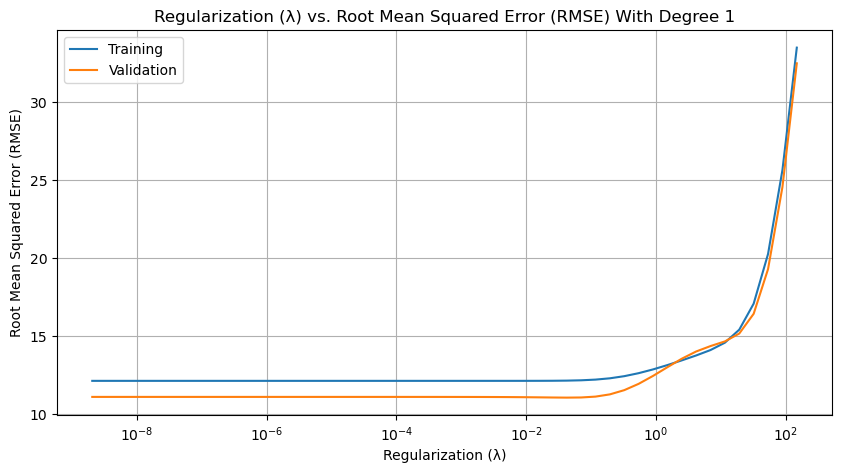

Degree: 1
Best regularization (λ): 0.042287433978813224
Testing RMSE: 12.712489336444296


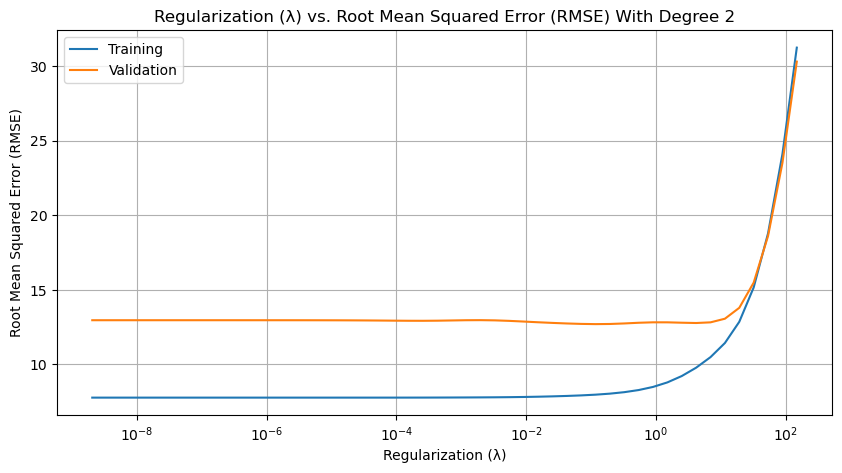

Degree: 2
Best regularization (λ): 0.11731916609425083
Testing RMSE: 11.34630246404949


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.25871e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


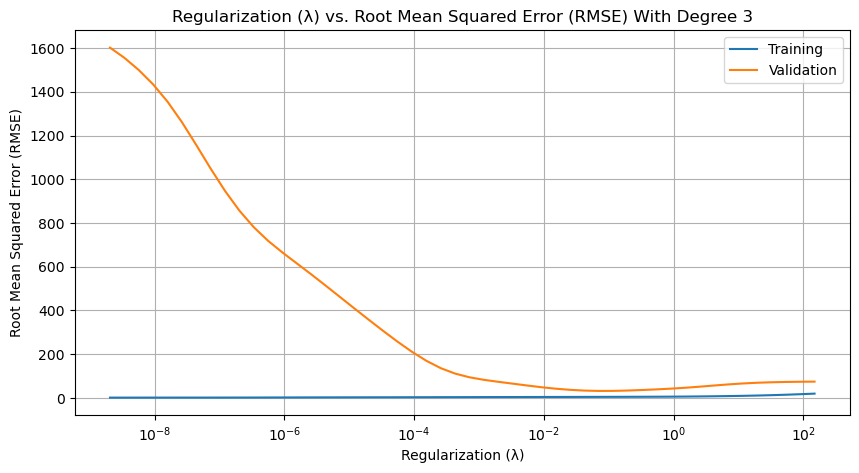

Degree: 3
Best regularization (λ): 0.07043526453886602
Testing RMSE: 32.050142474870725


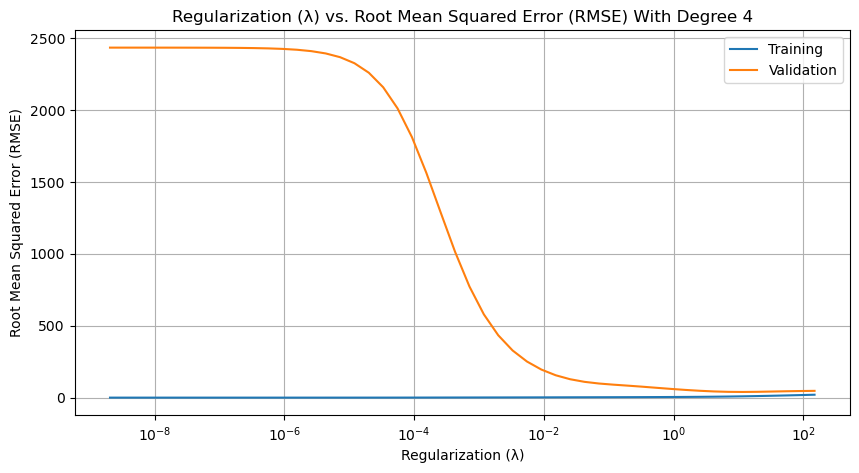

Degree: 4
Best regularization (λ): 11.576527906664275
Testing RMSE: 2605.7444815676877


In [26]:
# We found the least error occurs with a degree of 3.
# To exhaust all possibilities, let's also try degrees of 1, 2, 3, and 4.
# Perform Regression with a variety of degrees and regularization to get the best combination
X = preprocessed_dataset.drop(columns=["calories"])
Y = preprocessed_dataset["calories"]

degrees = [1,2,3,4]

for deg in degrees:

    F = PolynomialFeatures(degree=deg).fit_transform(X)
    X_test, X_train, Y_test, Y_train = train_test_split(
        F, Y, test_size=2/3, shuffle=True,
    )

    X_validation, X_train, Y_validation, Y_train = train_test_split(
        X_train, Y_train, test_size=1/2, shuffle=True,
    )
    
    lambdas = np.exp(np.linspace(-20, 5, 50))

    training_rmse = []
    validation_rmse = []

    for lmbd in lambdas:
        reg = Ridge(alpha=lmbd)
        reg.fit(X_train, Y_train)
        predicted_y_train = reg.predict(X_train)
        predicted_y_validation = reg.predict(X_validation)

        training_rmse.append((np.sqrt(np.mean((Y_train-predicted_y_train)**2))))
        validation_rmse.append((np.sqrt(np.mean((Y_validation-predicted_y_validation)**2))))

    # Plot RMSE vs. Regularization
    plt.figure(figsize=(10, 5))
    plt.semilogx(lambdas, training_rmse, label='Training')
    plt.semilogx(lambdas, validation_rmse, label='Validation')
    plt.title(f'Regularization (λ) vs. Root Mean Squared Error (RMSE) With Degree {deg}')
    plt.xlabel('Regularization (λ)')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    best_lambda = lambdas[np.argmin(validation_rmse)]
    print(f"Degree: {deg}")
    print(f'Best regularization (λ): {best_lambda}')

    # Re-train the model for testing data
    reg = Ridge(alpha=best_lambda)
    reg.fit(X_train, Y_train)
    predicted_y_test = reg.predict(X_test)

    # Calculate test RMSE
    test_rmse = np.sqrt(np.mean((Y_test-predicted_y_test)**2))
    print(f"Testing RMSE: {test_rmse}")

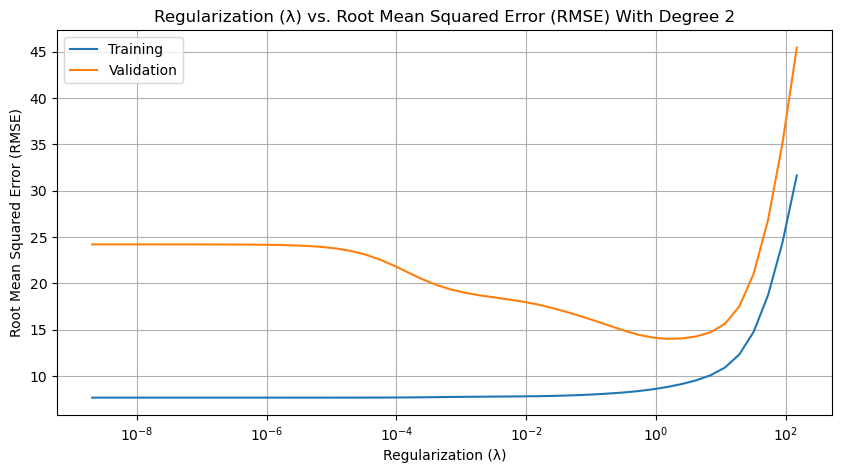

Degree: 2
Best regularization (λ): 1.5040527007501308
Testing RMSE: 13.510984325461994


In [48]:
# We see that the best testing RMSE is with a degree of 2. So let's focus on this:
X = preprocessed_dataset.drop(columns=["calories"])
Y = preprocessed_dataset["calories"]

F = PolynomialFeatures(degree=2).fit_transform(X)
X_test, X_train, Y_test, Y_train = train_test_split(
    F, Y, test_size=2/3, shuffle=True,
)

X_validation, X_train, Y_validation, Y_train = train_test_split(
    X_train, Y_train, test_size=1/2, shuffle=True,
)

lambdas = np.exp(np.linspace(-20, 5, 50))

training_rmse = []
validation_rmse = []

for lmbd in lambdas:
    reg = Ridge(alpha=lmbd)
    reg.fit(X_train, Y_train)
    predicted_y_train = reg.predict(X_train)
    predicted_y_validation = reg.predict(X_validation)

    training_rmse.append((np.sqrt(np.mean((Y_train-predicted_y_train)**2))))
    validation_rmse.append((np.sqrt(np.mean((Y_validation-predicted_y_validation)**2))))

# Plot RMSE vs. Regularization
plt.figure(figsize=(10, 5))
plt.semilogx(lambdas, training_rmse, label='Training')
plt.semilogx(lambdas, validation_rmse, label='Validation')
plt.title(f'Regularization (λ) vs. Root Mean Squared Error (RMSE) With Degree 2')
plt.xlabel('Regularization (λ)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.show()

best_lambda = lambdas[np.argmin(validation_rmse)]
print(f"Degree: {2}")
print(f'Best regularization (λ): {best_lambda}')

# Re-train the model for testing data
reg = Ridge(alpha=best_lambda)
reg.fit(X_train, Y_train)
predicted_y_test = reg.predict(X_test)

# Calculate test RMSE
test_rmse = np.sqrt(np.mean((Y_test-predicted_y_test)**2))
print(f"Testing RMSE: {test_rmse}")

In [50]:
# We find that the best combination with regression is with a degree of 2 and a regularization λ of about 1.5